In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


# Loading Datasets

In [2]:
df_cities = pd.read_csv('./data/cities.csv')
df_providers = pd.read_csv('./data/providers.csv')
df_station = pd.read_csv('./data/stations.csv')
df_ticket = pd.read_csv('./data/ticket_data.csv')

# Explore Datasets

### Cities DataFrame

In [3]:
df_cities.head(5)

id                     local_name unique_name   latitude  longitude  \
0   5159          Padua, Veneto, Italia       padua  45.406435  11.876761   
1     76    Barcelona, Cataluña, España   barcelona  41.385064   2.173404   
2     81    Basel, Basel-Stadt, Schweiz       basel  47.593437   7.619812   
3    259  Erlangen, Bayern, Deutschland    erlangen  49.589674  11.011961   
4  11979             Balș, Olt, România        balș  44.353354  24.095672   

   population  
0    209678.0  
1   1611822.0  
2         NaN  
3    105412.0  
4         NaN

In [4]:
print('Missing values (%) : ')

M1 =pd.DataFrame((df_cities.isnull().sum()/df_cities.shape[0])*100).transpose()
M1.style.applymap(lambda x: 'background-color : RED' if x>0 else 'background-color : Green')


Missing values (%) : 


###### There is alot of missing values within the population column ( more than 95%).  To solve this problem we can : 
* <font color='red'> **Drop** </font> Population Column from the DataFrame.
* <font color='red'> **Scrap** </font>  Population for each city. 


###### I tried with the second option ( you can find the scraper script in mygithub repository)

In [6]:
df_new_cities = pd.read_csv('./data/new_cities_csv.csv')
df_new_cities.sample(10)

id                                     local_name        unique_name  \
1985   1303          Ansfelden, Oberösterreich, Österreich          ansfelden   
7970  12109                Vittorio Veneto, Veneto, Italia    vittorio-veneto   
1682   9691        Koberg, Schleswig-Holstein, Deutschland             koberg   
3590   1641                    Feucht, Bayern, Deutschland             feucht   
404      56                     Avellino, Campania, Italia           avellino   
7959  12075       Pont-Saint-Martin, Valle d'Aosta, Italia  pont-saint-martin   
7881  10706     Τιγκάκι, Περιφέρεια Νοτίου Αιγαίου, Ελλάδα            τιγκάκι   
1325   9050                 Turnhout, Vlaanderen, Belgique           turnhout   
5191    530                      Millau, Occitanie, France             millau   
5142   9175  Vienne (France), Auvergne-Rhône-Alpes, France            vienne-   

       latitude  longitude population  
1985  48.209450  14.290175    15833.0  
7970  45.996239  12.300995    28320.0  
1682  53.654300  10.531900        NaN  
3590  49.375550  11.215153        NaN  
404   40.917630  14.791257    54561.0  
7959  45.596721   7.791617     3833.0  
7881  36.888574  27.183160        NaN  
1325  51.322800   4.937600   462457.0  
5191  44.100575   3.077801    22234.0  
5142  45.521300   4.874100    29162.0

In [7]:
print('Missing values (%) : ')

M2 =pd.DataFrame((df_new_cities.isnull().sum()/df_new_cities.shape[0])*100).transpose()
M2.style.applymap(lambda x: 'background-color : RED' if x>0 else 'background-color : Green')


Missing values (%) : 


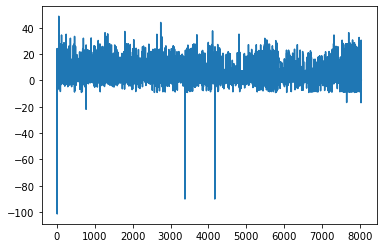

In [8]:
plt.plot(df_cities.longitude)

In [10]:
import folium

m3 = folium.Map(location=[45.7020953,6.0528321], tiles='openstreetmap', zoom_start=4)
    
for i in range(0,len(df_cities)):
    folium.Circle(location=[df_cities.iloc[i]['latitude'], df_cities.iloc[i]['longitude']], radius=50, color='red').add_to(m3)
m3.save('map3.html')


In [11]:
## distribution of cities
m3

### Providers DataFrame


In [12]:
df_providers.head()

id  company_id provider_id           name        fullname has_wifi  \
0   9           1         NaN         ouibus          Ouibus     True   
1  10           2         NaN        deinbus      Deinbus.de    False   
2  11           3         NaN        infobus         Infobus    False   
3  12           4         NaN  studentAgency  Student Agency    False   
4  13           5         NaN        flixbus         Flixbus     True   

  has_plug has_adjustable_seats has_bicycle transport_type  
0     True                 True       False            bus  
1    False                False       False            bus  
2    False                False       False            bus  
3    False                False       False            bus  
4    False                False       False            bus

In [13]:
df_providers.shape

(227, 10)

In [14]:
print('Number of missing values:')
M1 =pd.DataFrame(df_providers.isnull().sum()).transpose()
M1.style.applymap(lambda x: 'background-color : RED' if x>0 else 'background-color : Green')


Number of missing values:


### Station DataFrame

In [15]:
df_station.head()

id                     unique_name   latitude  longitude
0   1      Aalen (Stuttgarter Straße)  48.835296  10.092956
1   2      Aéroport Bordeaux-Mérignac  44.830226  -0.700883
2   3                   Aéroport CDG   49.009900   2.559310
3   4  Aéroport de Berlin-Schönefeld   52.389446  13.520345
4   5             Aéroport de Dresden  51.123604  13.764737

In [16]:
print('There is no missing values')
M1 =pd.DataFrame((df_station.isnull().sum())).transpose()
M1.style.applymap(lambda x: 'background-color : RED' if x>0 else 'background-color : Green')


There is no missing values


Text(0.5, 1.0, 'Latitude')

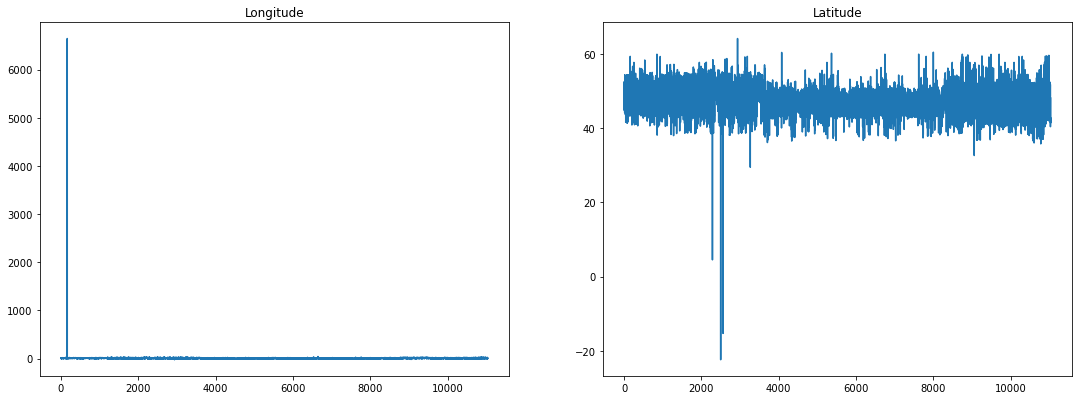

In [17]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(18.5, 6.5)

axes[0].plot(df_station.longitude)
axes[0].set_title('Longitude')

axes[1].plot(df_station.latitude)
axes[1].set_title('Latitude')


###### Longitude column contains outliers. we need to correct them

In [18]:
df_station[df_station.longitude >1000]

id                    unique_name   latitude  longitude
161  162  Combloux - Office du tourisme  45.894811     6645.0

In [19]:
df_station.at[df_station['id']==162 , 'longitude' ] = 6.645

Text(0.5, 1.0, 'Latitude')

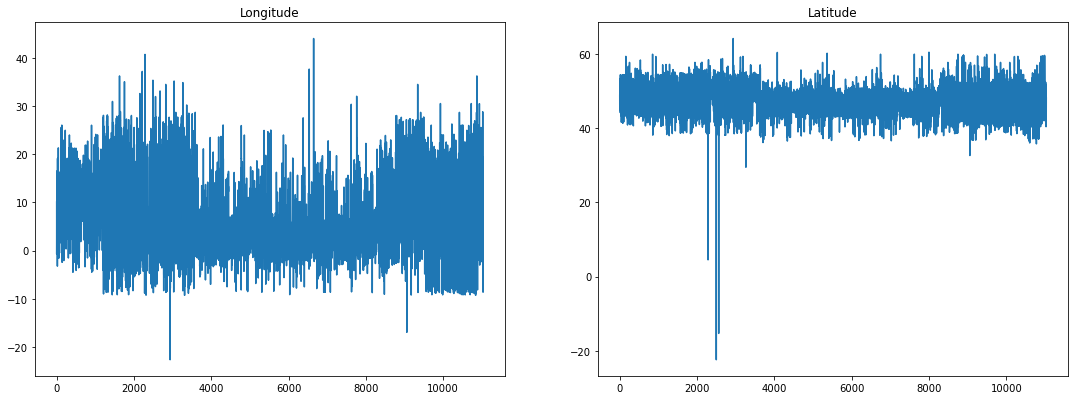

In [20]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(18.5, 6.5)

axes[0].plot(df_station.longitude)
axes[0].set_title('Longitude')

axes[1].plot(df_station.latitude)
axes[1].set_title('Latitude')


### Tickets DataFrame

In [22]:
df_ticket.head().style.background_gradient(cmap='Blues' ,subset=['price_in_cents'])

In [23]:
print('Missing Values(%):')
M1 =pd.DataFrame((df_ticket.isnull().sum()/df_ticket.shape[0])*100).transpose()
M1.style.applymap(lambda x: 'background-color : RED' if x>0 else 'background-color : Green')

Missing Values(%):


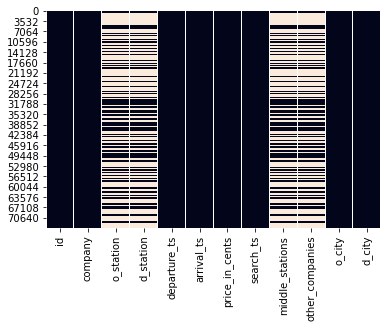

In [24]:
import seaborn as sns
sns.heatmap(df_ticket.isnull(), cbar=False)

###### There is no need to drop all rows that contains missing values ( we can replace o_station and d_station with o_city and d_city

# Calculate disatance

###### We need to calculate the distance for each trip. The distance between two point is given by this formula 



In [25]:
import math
from math import radians, sin, cos, acos

def calc_distance(lat_A, lon_A, lat_B, lon_B):
    """Retourne la distance en mètres entre les 2 points A et B connus grâce à
       leurs coordonnées(latitude et longitude).
    """
    RT= 6371.0 #rayon de la terre 
    
    a = sin(radians(lat_A)) * sin(radians(lat_B))
    b = cos(radians(lat_A)) * cos(radians(lat_B))
    c = cos(radians(lon_A) - radians(lon_B))
    
    S= acos(a + b*c) 
    return (RT * S)

def getCoords(Id1, df):
    '''Retourne les coordonnées d'un ville ou bien d'une station'''
    return (df[df['id'] == Id1].latitude.values[0] , df[df['id']==Id1].longitude.values[0])

def Trip_distance(row):
    ''' Retourner la distance d'un voyage  '''
    total_distance = 0
    try:
        start_point_coords = getCoords(float(row['o_station']),df_station) 
        destination_point_coords = getCoords(float(row['d_station']),df_station) 
    except :
        start_point_coords = getCoords(float(row['o_city']), df_cities)
        destination_point_coords = getCoords(float(row['d_city']), df_cities)

    try :
        transit_points_coords = [getCoords(float(x),df_station) for x in row['middle_stations'].values[0].strip('{}').split(',')] 
    except:
        transit_points_coords = []
    
    try:
        start_point = start_point_coords
        for transit_point in transit_points_coords:
            total_distance += calc_distance(start_point[0],start_point[1],transit_point[0],transit_point[1])
            start_point = transit_point
        
        total_distance += calc_distance(start_point[0],start_point[1] , destination_point_coords[0],destination_point_coords[1])
    except ValueError:
        total_distance = -1
        
    return total_distance


In [26]:
df_ticket["trip_distance"] = df_ticket.apply(Trip_distance, axis=1)

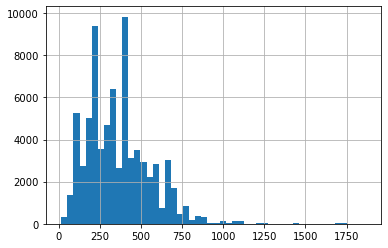

In [27]:
df_ticket.trip_distance.hist(bins=50)

### Calculate Trip Duration

In [28]:
from dateutil.parser import parse
import datetime

def parse2timestamp(datetime):
    return parse(datetime).timestamp()

df_ticket["trip_duration"] = df_ticket.apply(lambda row: parse2timestamp(row["arrival_ts"]) - parse2timestamp(row["departure_ts"]), axis=1)

def secToHour(secs):
    time = datetime.timedelta(seconds = secs)
    return time

In [29]:
df_ticket.head().style.format({"price_in_cents": "${:20,.0f}"})\
                      .background_gradient(cmap='Blues' ,subset=['price_in_cents','trip_duration'])

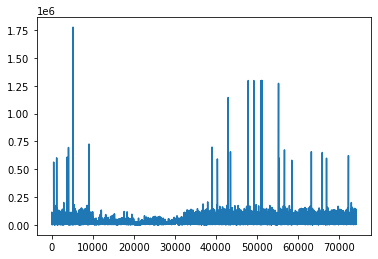

In [30]:
plt.plot(df_ticket['trip_duration'])

In [31]:
outliers_duration = df_ticket[df_ticket.trip_duration > 500000]
print('on a plus de '+ str(outliers_duration.shape[0]) +' valeurs à vérifier')

on a plus de 54 valeurs à vérifier


In [32]:
for idx , row in outliers_duration.iterrows():
    outliers_duration.at[outliers_duration['id']==row['id'] , 'time_travel' ] = secToHour(row['trip_duration'])
    outliers_duration.at[outliers_duration['id']==row['id'] , 'dep_city' ] = df_cities['local_name'][df_cities['id']==row['o_city']].values[0]
    outliers_duration.at[outliers_duration['id']==row['id'] , 'des_city' ] = df_cities['local_name'][df_cities['id']==row['d_city']].values[0]

In [33]:
outliers_duration[['time_travel','dep_city','des_city']].head(5)

time_travel                              dep_city  \
463  6 days 12:51:00  Bordeaux, Nouvelle-Aquitaine, France   
464  6 days 06:41:00  Bordeaux, Nouvelle-Aquitaine, France   
1189 6 days 23:25:00          Paris, Île-de-France, France   
1190 6 days 13:40:00          Paris, Île-de-France, France   
3730 7 days 01:15:00          Paris, Île-de-France, France   

                                  des_city  
463         Lille, Hauts-de-France, France  
464         Lille, Hauts-de-France, France  
1189  Biarritz, Nouvelle-Aquitaine, France  
1190  Biarritz, Nouvelle-Aquitaine, France  
3730               Venezia, Veneto, Italia

###### <font color='red'> **6 days** </font> to go from <font color='blue'> **Bordeaux** </font> to <font color='blue'> **Lille** </font>  <font color='red'> **!!** </font> This should be a mistake xD
###### We will drop these outliers from the dataset, otherwise the statics will not be accurate.

In [35]:
df_ticket.drop(df_ticket.index[list(outliers_duration.index)], inplace=True)

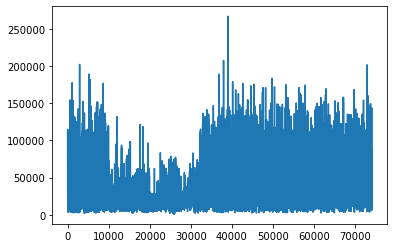

In [36]:
plt.plot(df_ticket['trip_duration'])

# Analyze the data


## Price

Statistique des prix (sans considérer la distance)

Prix moyen 43.81 $
Ecart-type  37.39 $
Prix minimum 3.00 $
Prix maximum 385.50 $


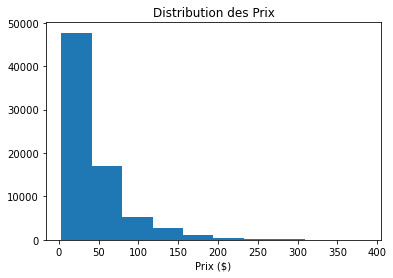

En observant la distribution des prix nous pouvons conclure que ces prix suivent une loi exponentielle. Ce qui indique que la majorité des billets sont achetés entre 3 $ et 50 $


Voyage prix minimum, entre: Perpignan, Occitanie, France
et: Paris, Île-de-France, France
Soit une distance de: 685.18 km (entre villes)


Voyage prix maximum, entre: Paris, Île-de-France, France Name:
et: Bordeaux, Nouvelle-Aquitaine, France
Soit une distance de: 498.53 km (entre gares)


In [37]:
# selectionner la colonne prix
prix = df_ticket['price_in_cents']

# statistique de base
print('Statistique des prix (sans considérer la distance)\n')
moyenne = np.mean(prix)
std = np.std(prix)
minimum = np.min(prix)
maximum = np.max(prix)

print('Prix moyen {:.2f} $'.format(moyenne/100))
print('Ecart-type {: .2f} $'.format(std/100))
print('Prix minimum {:.2f} $'.format(minimum/100))
print('Prix maximum {:.2f} $'.format(maximum/100))

# distribution des données (prix)
plt.hist(prix/100)
plt.title('Distribution des Prix')
plt.xlabel('Prix ($)')
plt.show()
print('En observant la distribution des prix nous pouvons conclure que ces prix suivent une loi exponentielle. Ce qui indique que la majorité des billets sont achetés entre 3 $ et 50 $')

# analyse des extremum
minimum_loc = np.argmin(prix)
maximum_loc = np.argmax(prix)

# minimum location
o_city_min = df_ticket['o_city'].loc[minimum_loc]
d_city_min = df_ticket['d_city'].loc[minimum_loc]
o_city_min = df_cities.loc[df_cities['id'] == o_city_min]
d_city_min = df_cities.loc[df_cities['id'] == d_city_min]
o_name_min = str(o_city_min['local_name']).split()[1:4]
d_name_min = str(d_city_min['local_name']).split()[1:4]
print('\n\nVoyage prix minimum, entre: {} {} {}'.format(o_name_min[0], o_name_min[1], o_name_min[2]))
print('et: {} {} {}'.format(d_name_min[0], d_name_min[1], d_name_min[2]))

# distance pour prix mini
lat_o = float(str(o_city_min['latitude']).split()[1])
lon_o = float(str(o_city_min['longitude']).split()[1])
lat_d = float(str(d_city_min['latitude']).split()[1])
lon_d = float(str(d_city_min['longitude']).split()[1])
dist = calc_distance(lat_o, lon_o, lat_d, lon_d)
print('Soit une distance de: {:.2f} km (entre villes)'.format(dist))

# maximum location
o_city_max = df_ticket['o_city'].loc[maximum_loc]
d_city_max = df_ticket['d_city'].loc[maximum_loc]
o_city_max = df_cities.loc[df_cities['id'] == o_city_max]
d_city_max = df_cities.loc[df_cities['id'] == d_city_max]
o_name_max = str(o_city_max['local_name']).split()[1:5]
d_name_max = str(d_city_max['local_name']).split()[1:4]
print('\n\nVoyage prix maximum, entre: {} {} {} {}'.format(o_name_max[0], o_name_max[1], o_name_max[2], o_name_max[3]))
print('et: {} {} {}'.format(d_name_max[0], d_name_max[1], d_name_max[2]))

o_station_max = df_ticket['o_station'].loc[maximum_loc]
d_station_max = df_ticket['d_station'].loc[maximum_loc]
o_station_max = df_station.loc[df_station['id'] == o_station_max]
d_station_max = df_station.loc[df_station['id'] == d_station_max]
lat_o = float(str(o_station_max['latitude']).split()[1])
lon_o = float(str(o_station_max['longitude']).split()[1])
lat_d = float(str(d_station_max['latitude']).split()[1])
lon_d = float(str(d_station_max['longitude']).split()[1])
dist = calc_distance(lat_o, lon_o, lat_d, lon_d)
print('Soit une distance de: {:.2f} km (entre gares)'.format(dist))


## Duration

In [38]:
# selectionner la colonne trip_duration
duration = df_ticket['trip_duration']

moyenne = secToHour(np.mean(duration))
std = secToHour(np.std(duration))
minimum = secToHour(np.min(duration))
maximum = secToHour(np.max(duration))

print('Durée moyenne {}'.format(moyenne))
print('Ecart-type {}'.format(std))
print('Durée minimum {}'.format(minimum))
print('Durée maximum {}'.format(maximum))

Durée moyenne 6:52:58.363872
Ecart-type 6:17:58.336759
Durée minimum 0:20:00
Durée maximum 3 days, 2:10:00


## Distance

In [39]:
# selectionner la colonne trip_duration
distance = df_ticket['trip_distance']

moyenne = np.mean(distance)
std = np.std(distance)
minimum = np.min(distance)
maximum = np.max(distance)

print('Distance moyenne {:.2f} km'.format(moyenne))
print('Ecart-type {:.2f} km'.format(std))
print('Distance minimum {:.2f} km'.format(minimum))
print('Distance maximum {:.2f} km'.format(maximum))


Distance moyenne 362.04 km
Ecart-type 194.27 km
Distance minimum 16.57 km
Distance maximum 1865.47 km


## Extraire des infos intéressantes par trajet


In [40]:
Trips_info = pd.DataFrame(columns=['Departure_station', 'Arrival_station', 'Lowest_price','Average_price','Highest_price','Min_Duration','Average_duration','Max_duration'])


In [41]:
grouped_by_station = df_ticket.groupby(["o_station", "d_station"])

for (start_point, end_point), group in grouped_by_station:
    
    min_price = group["price_in_cents"].min()/100
    max_price = group["price_in_cents"].max()/100
    avg_price = group["price_in_cents"].mean()/100
    
    min_duration = secToHour(group['trip_distance'].min())
    max_duration = secToHour(group['trip_duration'].max())
    avg_duration = secToHour(group['trip_duration'].mean())
    
    row = {'Departure_station': df_station[df_station['id']== start_point].unique_name.values[0],
           'Arrival_station': df_station[df_station['id']== end_point].unique_name.values[0], 
           'Lowest_price':min_price,
           'Average_price':avg_price,
           'Highest_price':max_price,
           'Min_Duration':min_duration ,
           'Average_duration':avg_duration,
           'Max_duration':max_duration}
    
    Trips_info=Trips_info.append(row,ignore_index=True)

In [42]:
def highlight_cols(x):
    r = 'background-color: red'
    g = 'background-color: green'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = r
    df1.iloc[:, 7] = r
    df1.iloc[:, 2] = g
    df1.iloc[:, 5] = g
    
    return df1    


In [43]:
Trips_info.sample(10).style.format({"Lowest_price": "${:20,.2f}",
                                'Average_price': "${:20,.2f}",
                                'Highest_price': "${:20,.2f}"})\
                               .background_gradient(cmap='Blues',subset=['Lowest_price','Average_price','Highest_price'])

## différence de prix moyen et durée selon le train, le bus et le covoit selon la distance du trajet (0-200km, 201-800km, 800-2000km, 2000+km) 


In [44]:
df_providers.columns = ['company','company_id','provider_id','name','fullname','has_wifi','has_plug','has_adjustable_seats','has_bicycle','transport_type']
table = pd.merge(df_ticket, df_providers, on='company')
table.head()

id  company  o_station  d_station            departure_ts  \
0  6795025     8385        NaN        NaN  2017-10-13 14:00:00+00   
1  6795030     8385        NaN        NaN  2017-10-06 05:30:00+00   
2  6795031     8385        NaN        NaN  2017-10-06 07:00:42+00   
3  6795032     8385        NaN        NaN  2017-10-06 07:10:00+00   
4  6795033     8385        NaN        NaN  2017-10-06 10:00:00+00   

               arrival_ts  price_in_cents                   search_ts  \
0  2017-10-13 20:10:00+00            4550  2017-10-01 00:13:31.327+00   
1  2017-10-06 08:30:00+00            1800  2017-10-01 01:03:18.948+00   
2  2017-10-06 09:30:42+00            2150  2017-10-01 01:03:18.948+00   
3  2017-10-06 09:40:00+00            1700  2017-10-01 01:03:18.948+00   
4  2017-10-06 12:50:00+00            1700  2017-10-01 01:03:18.948+00   

  middle_stations other_companies  ...  trip_duration  company_id  \
0             NaN             NaN  ...        22200.0          11   
1             NaN             NaN  ...        10800.0          11   
2             NaN             NaN  ...         9000.0          11   
3             NaN             NaN  ...         9000.0          11   
4             NaN             NaN  ...        10200.0          11   

   provider_id  name   fullname has_wifi has_plug has_adjustable_seats  \
0          NaN   bbc  Blablacar    False    False                False   
1          NaN   bbc  Blablacar    False    False                False   
2          NaN   bbc  Blablacar    False    False                False   
3          NaN   bbc  Blablacar    False    False                False   
4          NaN   bbc  Blablacar    False    False                False   

  has_bicycle transport_type  
0       False     carpooling  
1       False     carpooling  
2       False     carpooling  
3       False     carpooling  
4       False     carpooling  

[5 rows x 23 columns]

In [45]:
summary_df = pd.DataFrame(columns=['bus','carpooling','train'])

nb_utilisation = table.groupby('transport_type')['transport_type'].count()
nb_utilisation.name= "Nombres d'Utilisation"

prix_avg = table.groupby('transport_type')['price_in_cents'].sum() / table.groupby('transport_type')['transport_type'].count()
prix_avg.name = "prix moyen $"

duration_avg = table.groupby('transport_type')['trip_duration'].sum()/table.groupby('transport_type')['transport_type'].count()
duration_avg.name = "durée moyenne"

summary_df = summary_df.append(nb_utilisation)
summary_df = summary_df.append(prix_avg/100)
summary_df = summary_df.append(duration_avg.map(secToHour))

summary_df.transpose().head().style.bar(subset=["prix moyen $"], color='#ee1f5f')

### Comparatif des modes de transport avec tranches de distance


In [46]:
summary_df_2 = pd.DataFrame()
summary_df_2[['Prix (0:200)', 'Durée (0:200)']] =table.loc[table["trip_distance"].between(0,200) ].groupby("transport_type").mean()[["price_in_cents", "trip_duration"]]
summary_df_2[['Prix (200:800)', 'Durée (200:800)']] = table.loc[table["trip_distance"].between(200,800) ].groupby("transport_type").mean()[["price_in_cents", "trip_duration"]]
summary_df_2[['Prix (800:2000)', 'Durée (800:2000)']] = table.loc[table["trip_distance"].between(800,2000) ].groupby("transport_type").mean()[["price_in_cents", "trip_duration"]]
summary_df_2[['Prix (>=2000)', 'Durée (>=2000)']] = table.loc[table["trip_distance"] >=2000 ].groupby("transport_type").mean()[["price_in_cents", "trip_duration"]]

In [47]:
summary_df_2

Prix (0:200)  Durée (0:200)  Prix (200:800)  Durée (200:800)  \
transport_type                                                                 
bus              2094.513676   37297.745163     3528.332616     51094.213498   
carpooling       1177.352385    7027.342428     3218.064310     17147.272436   
train            3597.305970   15700.097015     9189.725709     27854.126287   

                Prix (800:2000)  Durée (800:2000)  Prix (>=2000)  \
transport_type                                                     
bus                 6929.113051      89529.375000            NaN   
carpooling          8626.545455      47160.839161            NaN   
train              15680.126183      43982.460568            NaN   

                Durée (>=2000)  
transport_type                  
bus                        NaN  
carpooling                 NaN  
train                      NaN

In [48]:
summary_df_2.loc['carpooling']['Prix (0:200)']

1177.352384745594

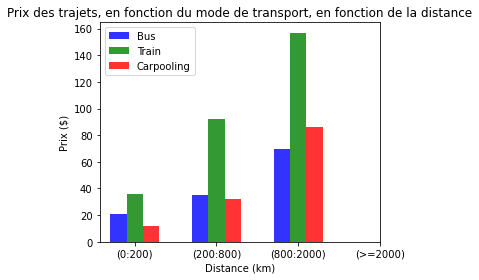

In [49]:
# data to plot
n_groups = 4
Bus_Price = (summary_df_2.loc['bus']['Prix (0:200)']/100, summary_df_2.loc['bus']['Prix (200:800)']/100, summary_df_2.loc['bus']['Prix (800:2000)']/100, summary_df_2.loc['bus']['Prix (>=2000)']/100)
Train_Price = (summary_df_2.loc['train']['Prix (0:200)']/100, summary_df_2.loc['train']['Prix (200:800)']/100, summary_df_2.loc['train']['Prix (800:2000)']/100, summary_df_2.loc['train']['Prix (>=2000)']/100)
Carpooling_Price = (summary_df_2.loc['carpooling']['Prix (0:200)']/100, summary_df_2.loc['carpooling']['Prix (200:800)']/100, summary_df_2.loc['carpooling']['Prix (800:2000)']/100, summary_df_2.loc['carpooling']['Prix (>=2000)']/100)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, Bus_Price, bar_width,
alpha=opacity,
color='b',
label='Bus')

rects2 = plt.bar(index + bar_width, Train_Price, bar_width,
alpha=opacity,
color='g',
label='Train')

rects3 = plt.bar(index + 2*bar_width, Carpooling_Price, bar_width,
alpha=opacity,
color='r',
label='Carpooling')

plt.xlabel('Distance (km)')
plt.ylabel('Prix ($)')
plt.title('Prix des trajets, en fonction du mode de transport, en fonction de la distance')
plt.xticks(index + bar_width, ('(0:200)', '(200:800)', '(800:2000)', '(>=2000)'))
plt.legend()

plt.tight_layout()
plt.show()


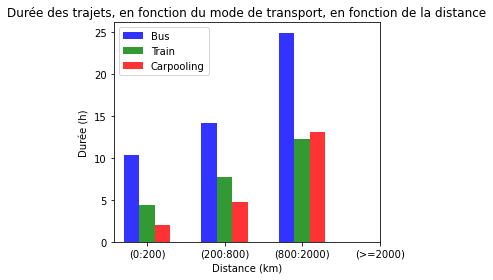

In [50]:
# data to plot
n_groups = 4
Bus_Price = (summary_df_2.loc['bus']['Durée (0:200)']/3600, summary_df_2.loc['bus']['Durée (200:800)']/3600, summary_df_2.loc['bus']['Durée (800:2000)']/3600, summary_df_2.loc['bus']['Durée (>=2000)']/3600)
Train_Price = (summary_df_2.loc['train']['Durée (0:200)']/3600, summary_df_2.loc['train']['Durée (200:800)']/3600, summary_df_2.loc['train']['Durée (800:2000)']/3600, summary_df_2.loc['train']['Durée (>=2000)']/3600)
Carpooling_Price = (summary_df_2.loc['carpooling']['Durée (0:200)']/3600, summary_df_2.loc['carpooling']['Durée (200:800)']/3600, summary_df_2.loc['carpooling']['Durée (800:2000)']/3600, summary_df_2.loc['carpooling']['Durée (>=2000)']/3600)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, Bus_Price, bar_width,
alpha=opacity,
color='b',
label='Bus')

rects2 = plt.bar(index + bar_width, Train_Price, bar_width,
alpha=opacity,
color='g',
label='Train')

rects3 = plt.bar(index + 2*bar_width, Carpooling_Price, bar_width,
alpha=opacity,
color='r',
label='Carpooling')

plt.xlabel('Distance (km)')
plt.ylabel('Durée (h)')
plt.title('Durée des trajets, en fonction du mode de transport, en fonction de la distance')
plt.xticks(index + bar_width, ('(0:200)', '(200:800)', '(800:2000)', '(>=2000)'))
plt.legend()

plt.tight_layout()
plt.show()

In [51]:
### plus grande distance 
latA,lngA = getCoords(df_ticket[df_ticket.trip_distance == df_ticket.trip_distance.max()]['o_station'].values[0],df_station)
latC,lngC = getCoords(int(df_ticket[df_ticket.trip_distance == df_ticket.trip_distance.max()]['middle_stations'].values[0].strip('{}').split(',')[0]),df_station)
latB,lngB = getCoords(df_ticket[df_ticket.trip_distance == df_ticket.trip_distance.max()]['d_station'].values[0],df_station)

### plus grande durée
latAA,lngAA = getCoords(df_ticket[df_ticket.trip_duration == df_ticket.trip_duration.max()]['o_city'].values[0],df_cities)
#latCC,lngCC = getCoords(int(df_ticket[df_ticket.trip_duration == df_ticket.trip_duration.min()]['middle_stations'].values[0].strip('{}').split(',')[0]),df_station)
latBB,lngBB = getCoords(df_ticket[df_ticket.trip_duration == df_ticket.trip_duration.max()]['d_city'].values[0],df_cities)



In [52]:
import folium

m2 = folium.Map(location=[48.7020953,18.0528321], tiles='openstreetmap', zoom_start=4)
points = [(latA,lngA),(latC,lngC),(latB,lngB)]
points2 = [(latAA,lngAA),(latBB,lngBB)]

folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(m2)
folium.PolyLine(points2, color="blue", weight=2.5, opacity=1).add_to(m2)

m2.save('map3.html')


In [53]:
m2